In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

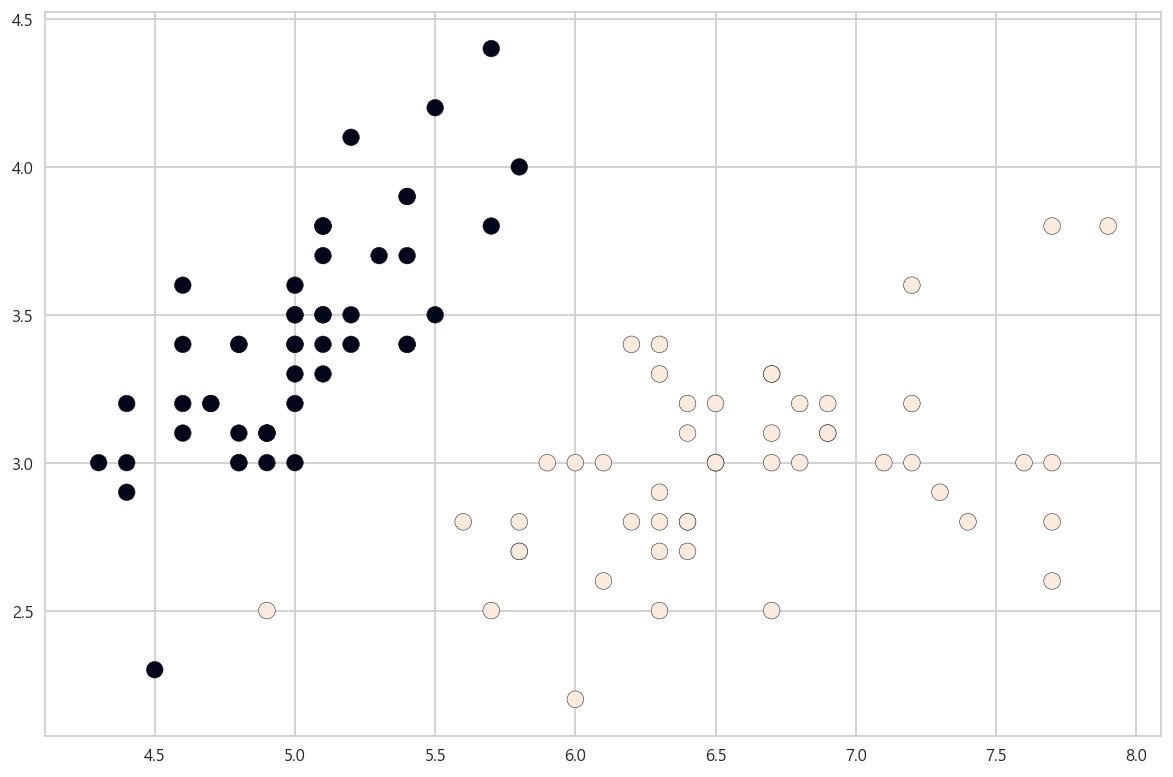

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()


In [3]:
from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


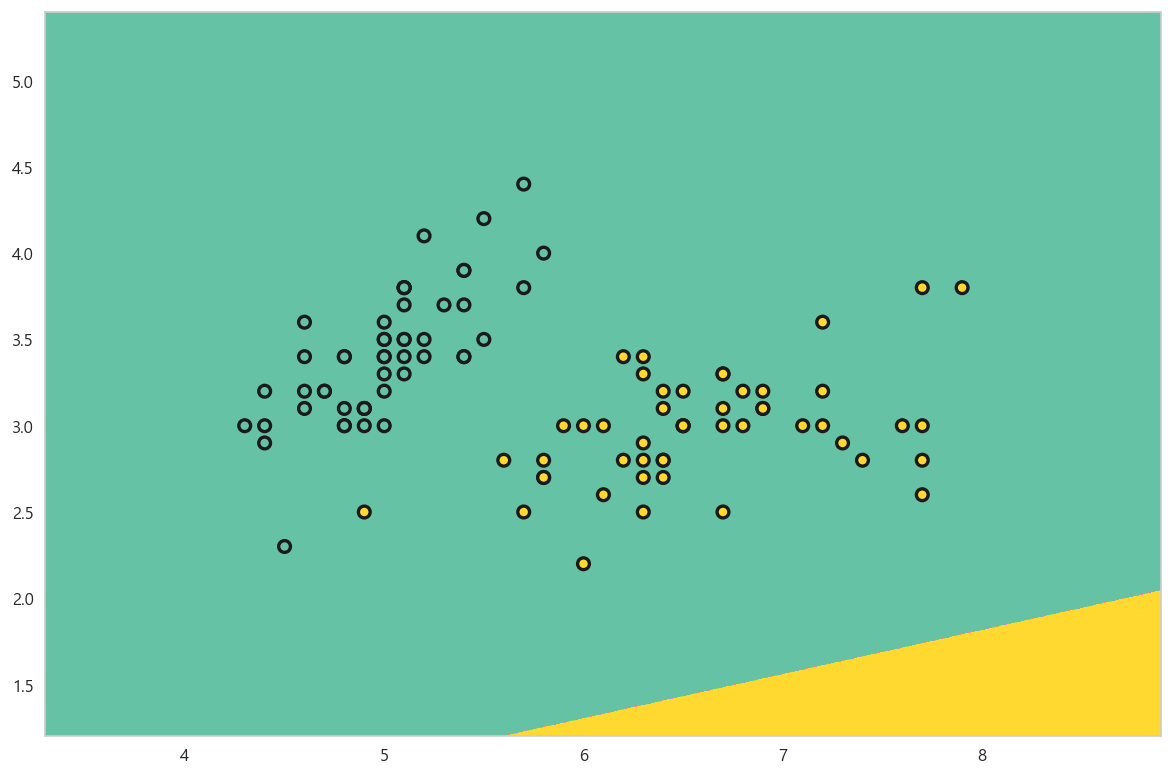

In [4]:
plot_perceptron(1)


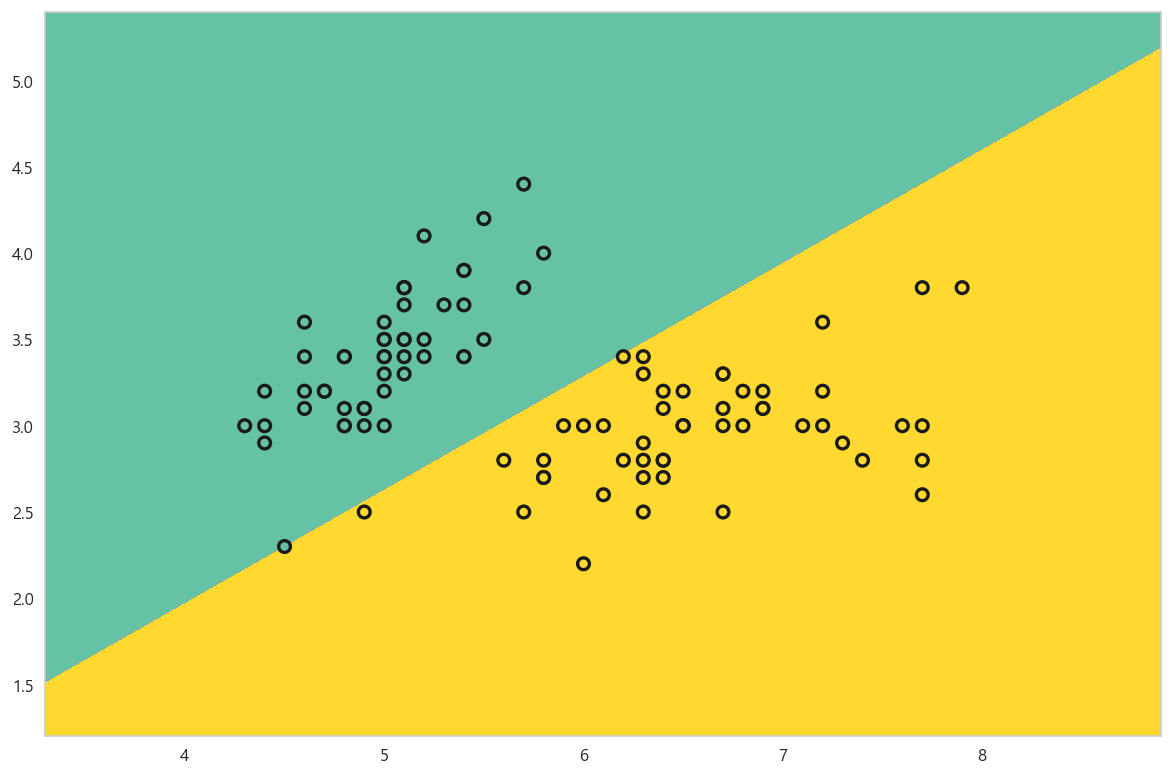

In [5]:
plot_perceptron(500)


# 서포트 벡터머신 제대로 써보자
- https://datascienceschool.net/view-notebook/6c6d450cb2ee49558856fd924b326e00/

In [85]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

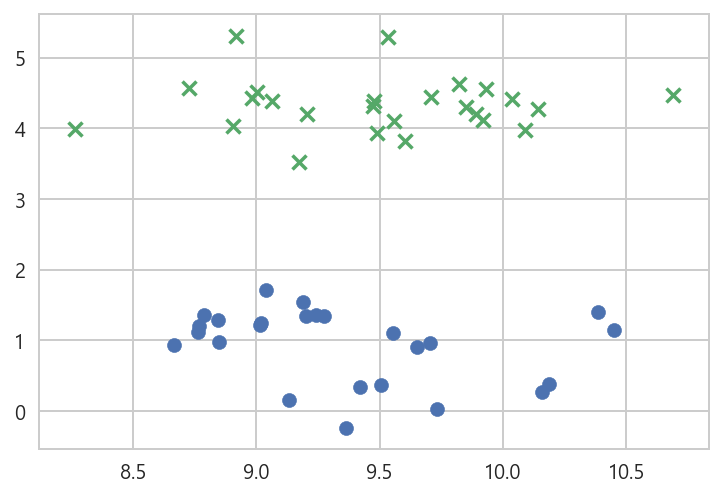

In [86]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.show()


In [87]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

# 서포트벡터머신을 사용하려면 여기서 커널이라는 인수를 kernel=linear, C=1e10 로 넣는다.
# 슬랙변수를 사용하려고 한다면 C를 낮춰서 본다. 여러개가 생길수도 있다.

In [88]:
model.n_support_ 

array([1, 1])

In [89]:
model.support_ #서포트벡터로 사용되는 데이터 보기

array([42,  1])

In [90]:
model.support_vectors_
# 서포트 벡터의 위치

array([[ 9.03715314,  1.71813465],
       [ 9.17124955,  3.52485535]])

In [91]:
y[model.support_]


array([-1,  1])

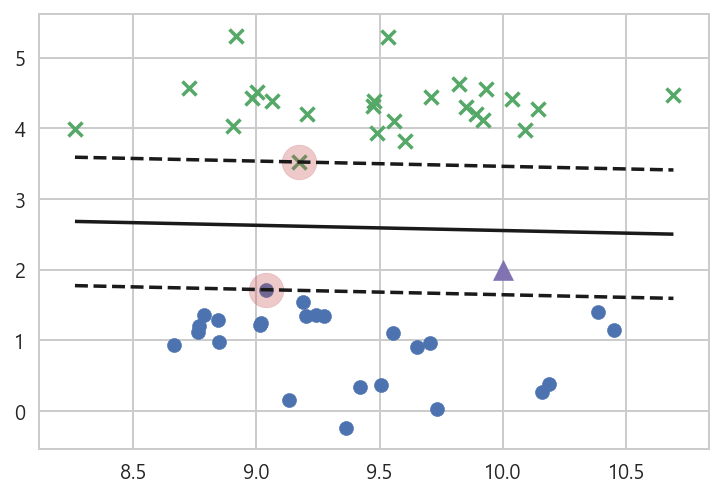

In [92]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()


In [93]:
x_new = [10, 2]
model.decision_function([x_new]) # 새로운 삼각형데이터 넣어보고 positive인지 negative인지 구별하기

array([-0.61101582])

In [94]:
model.coef_.dot(x_new) + model.intercept_ # W.T * W0 임

array([-0.61101582])

In [95]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [96]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.intercept_

array([-0.61101582])

# 연습문제 1

In [97]:
from sklearn.datasets import load_iris

iris = load_iris()
y = iris.target
y = y[y<2]
X = iris.data[:len(y), [0, 1]]
# iris.target_names

len(X)

100

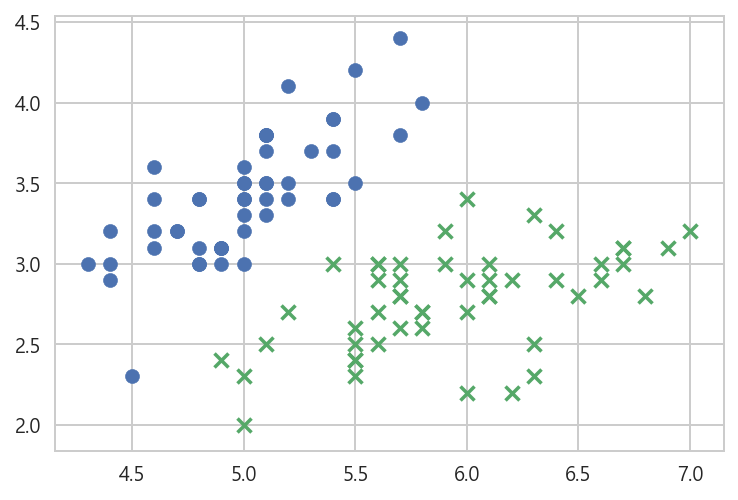

In [98]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()


In [99]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1).fit(X, y)

# 서포트벡터머신을 사용하려면 여기서 인수를 kernel=linear, C=1e10(충분히 큰수) 로 넣는다.

In [100]:
model.n_support_

array([8, 8])

In [101]:
model.support_

array([ 1, 18, 20, 25, 31, 36, 41, 45, 57, 59, 66, 70, 84, 85, 88, 98])

In [102]:
model.support_vectors_

array([[ 4.9,  3. ],
       [ 5.7,  3.8],
       [ 5.4,  3.4],
       [ 5. ,  3. ],
       [ 5.4,  3.4],
       [ 5.5,  3.5],
       [ 4.5,  2.3],
       [ 4.8,  3. ],
       [ 4.9,  2.4],
       [ 5.2,  2.7],
       [ 5.6,  3. ],
       [ 5.9,  3.2],
       [ 5.4,  3. ],
       [ 6. ,  3.4],
       [ 5.6,  3. ],
       [ 5.1,  2.5]])

In [103]:
y[model.support_]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

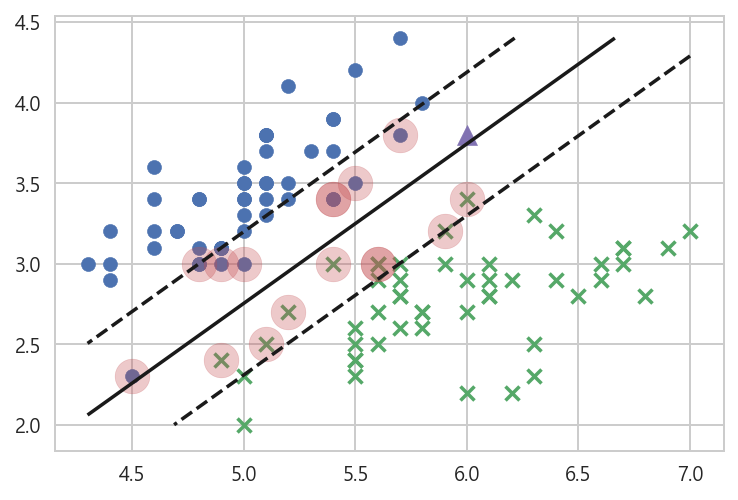

In [104]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [6, 3.8]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()


In [105]:
model.decision_function([x_new])


array([-0.12703403])

# 연습문제 2

In [113]:
from sklearn.datasets import load_iris

iris = load_iris()
y = iris.target
y = y[y>0]
X = iris.data[50:, [2, 3]]
# iris.target_names

len(X)

100

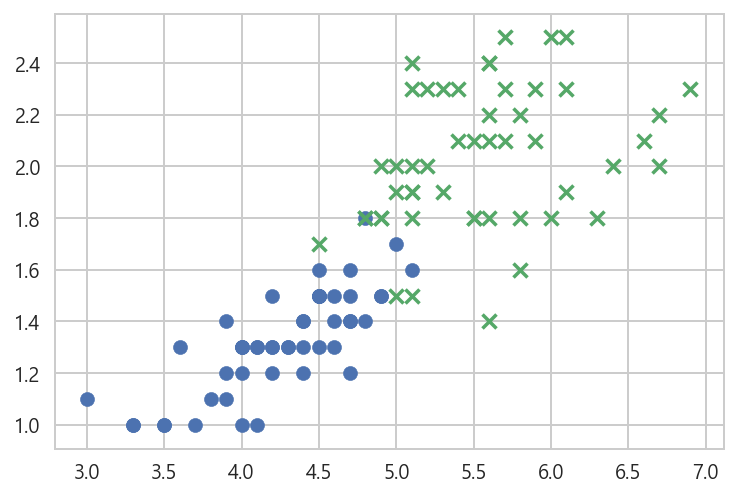

In [114]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='x')
plt.show()


In [115]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1).fit(X, y)

# 서포트벡터머신을 사용하려면 여기서 인수를 kernel=linear, C=1e10(충분히 큰수) 로 넣는다.

In [116]:
model.n_support_

array([12, 12])

In [117]:
model.support_

array([ 0,  2,  4,  6, 13, 20, 22, 26, 27, 33, 35, 36, 56, 69, 71, 73, 76,
       77, 83, 84, 88, 92, 96, 99])

In [118]:
model.support_vectors_

array([[ 4.7,  1.4],
       [ 4.9,  1.5],
       [ 4.6,  1.5],
       [ 4.7,  1.6],
       [ 4.7,  1.4],
       [ 4.8,  1.8],
       [ 4.9,  1.5],
       [ 4.8,  1.4],
       [ 5. ,  1.7],
       [ 5.1,  1.6],
       [ 4.5,  1.6],
       [ 4.7,  1.5],
       [ 4.5,  1.7],
       [ 5. ,  1.5],
       [ 4.9,  2. ],
       [ 4.9,  1.8],
       [ 4.8,  1.8],
       [ 4.9,  1.8],
       [ 5.1,  1.5],
       [ 5.6,  1.4],
       [ 4.8,  1.8],
       [ 5.1,  1.9],
       [ 5. ,  1.9],
       [ 5.1,  1.8]])

In [119]:
y[model.support_]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

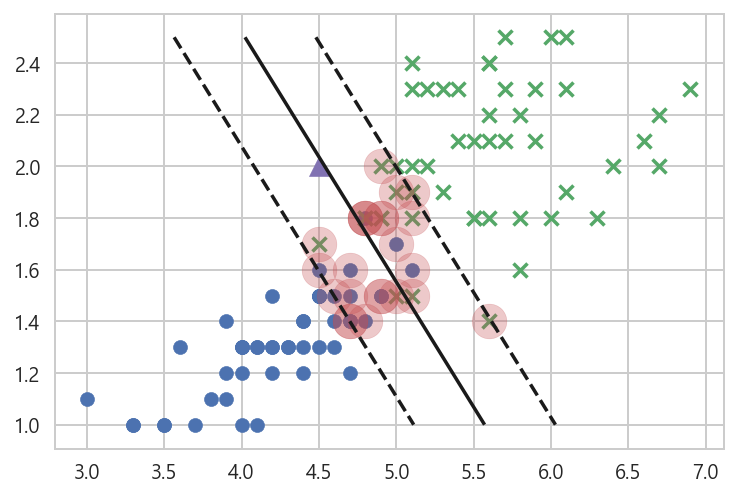

In [121]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [4.5, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()


In [122]:
model.decision_function([x_new])


array([-0.08439535])

---
# 커널 서포트 벡터머신

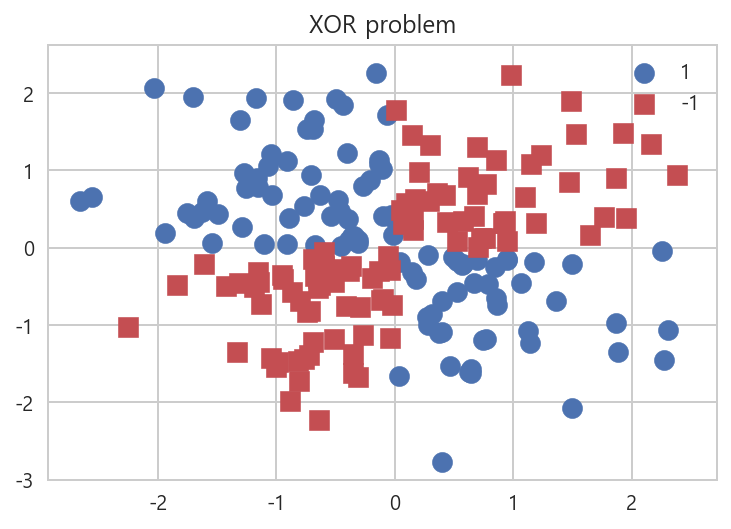

In [124]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

In [133]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    plt.figure(figsize=(8,8))
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

In [125]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

X = np.arange(8).reshape(4, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [126]:
FunctionTransformer(basis).fit_transform(X)

array([[  0.        ,   0.        ,   1.        ],
       [  4.        ,   8.48528137,   9.        ],
       [ 16.        ,  28.28427125,  25.        ],
       [ 36.        ,  59.39696962,  49.        ]])

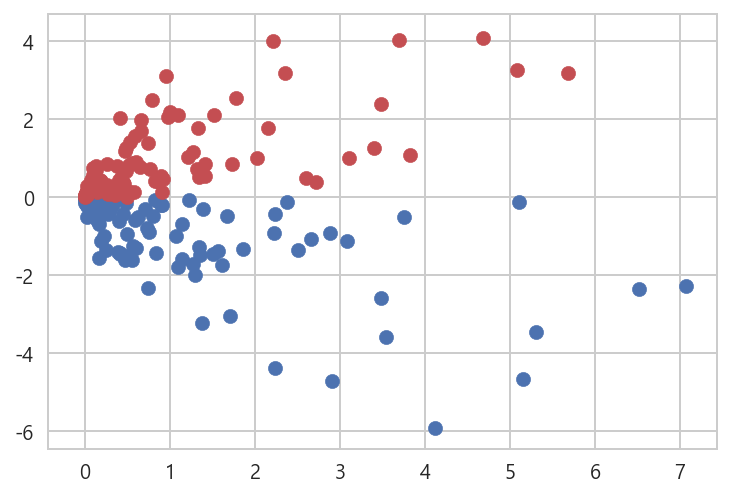

In [127]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor== 1, 0], X_xor2[y_xor== 1, 1], c="b", s=50)
plt.scatter(X_xor2[y_xor==-1, 0], X_xor2[y_xor==-1, 1], c="r", s=50)
plt.show()

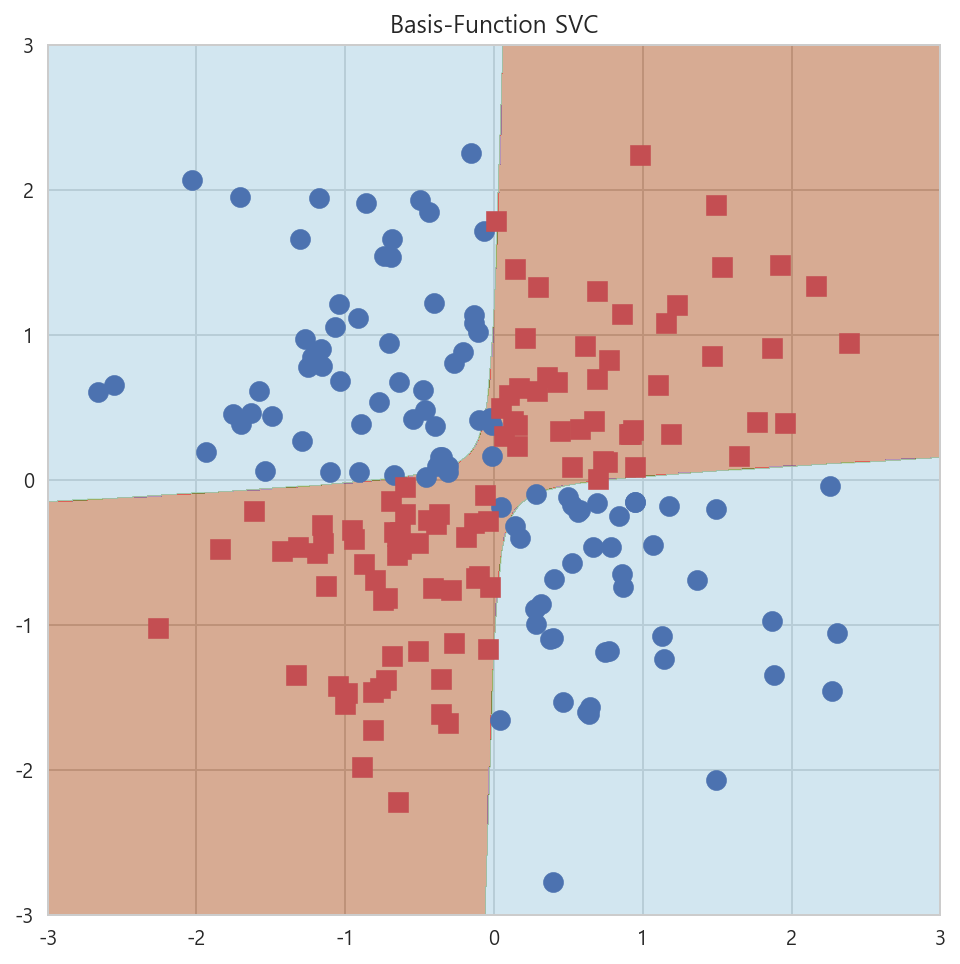

In [134]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Basis-Function SVC")

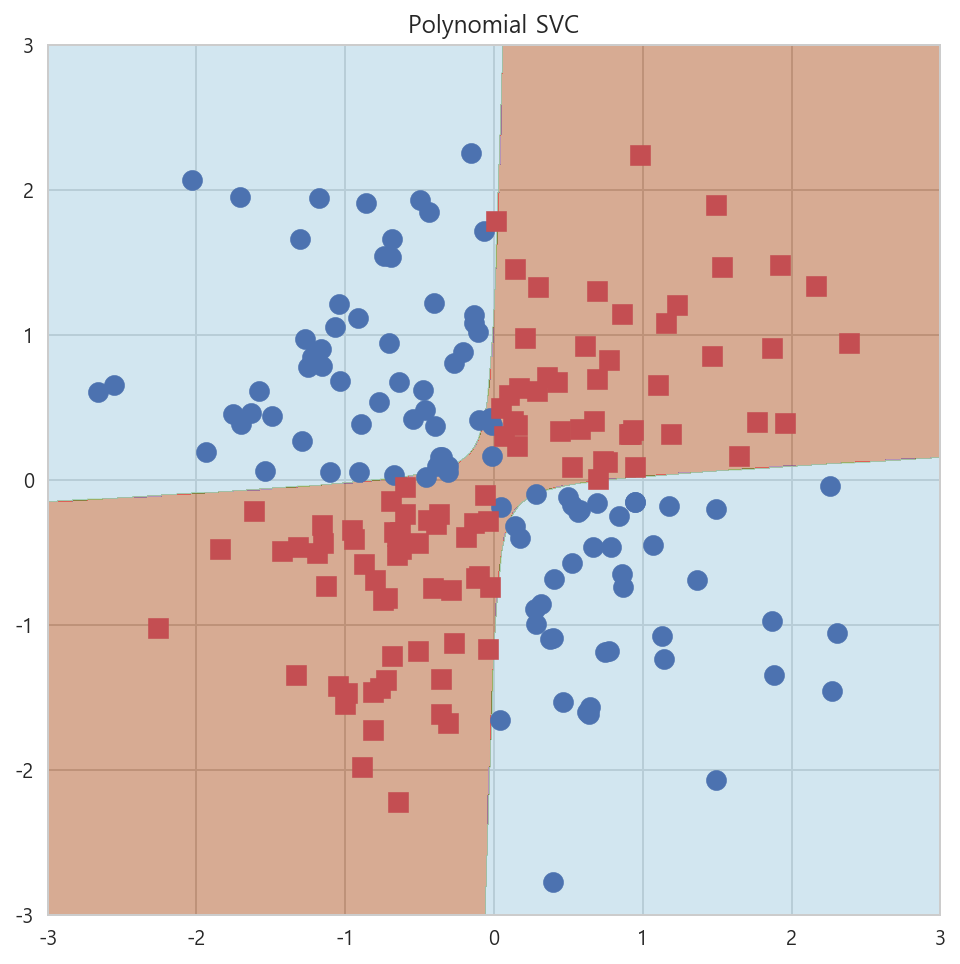

In [135]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Polynomial SVC")

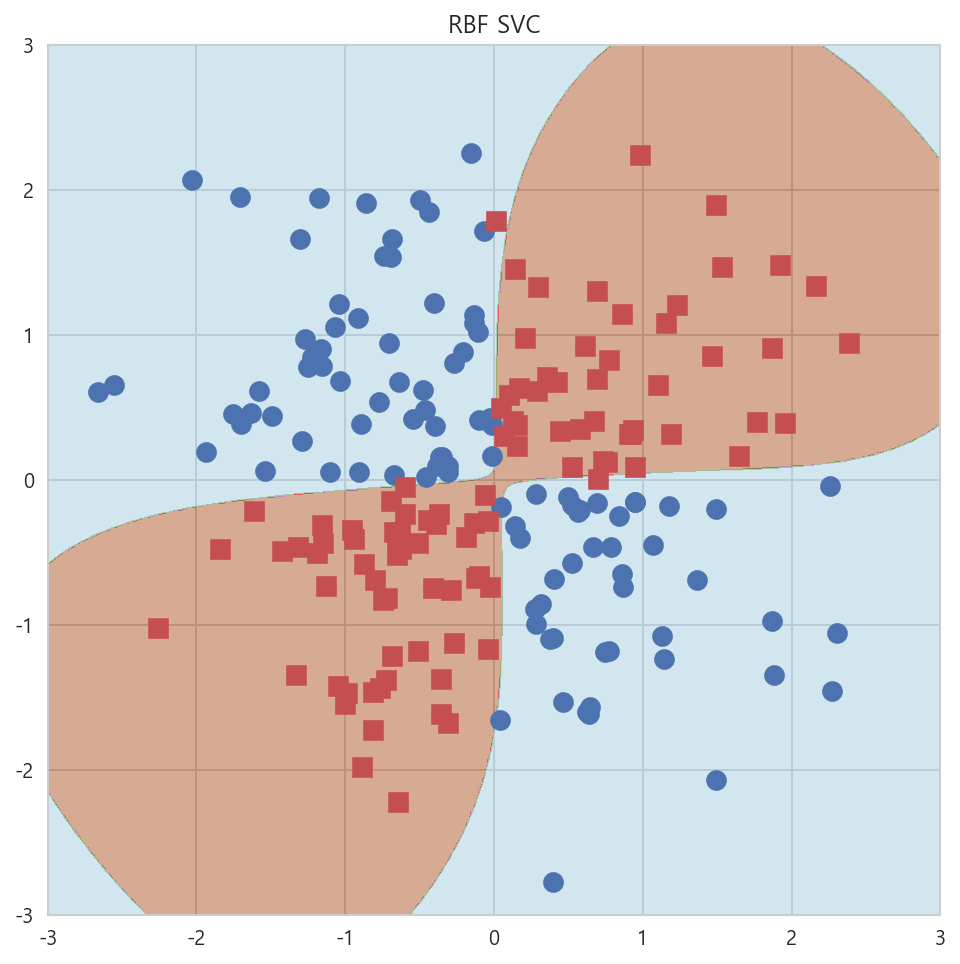

In [136]:
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, "RBF SVC")

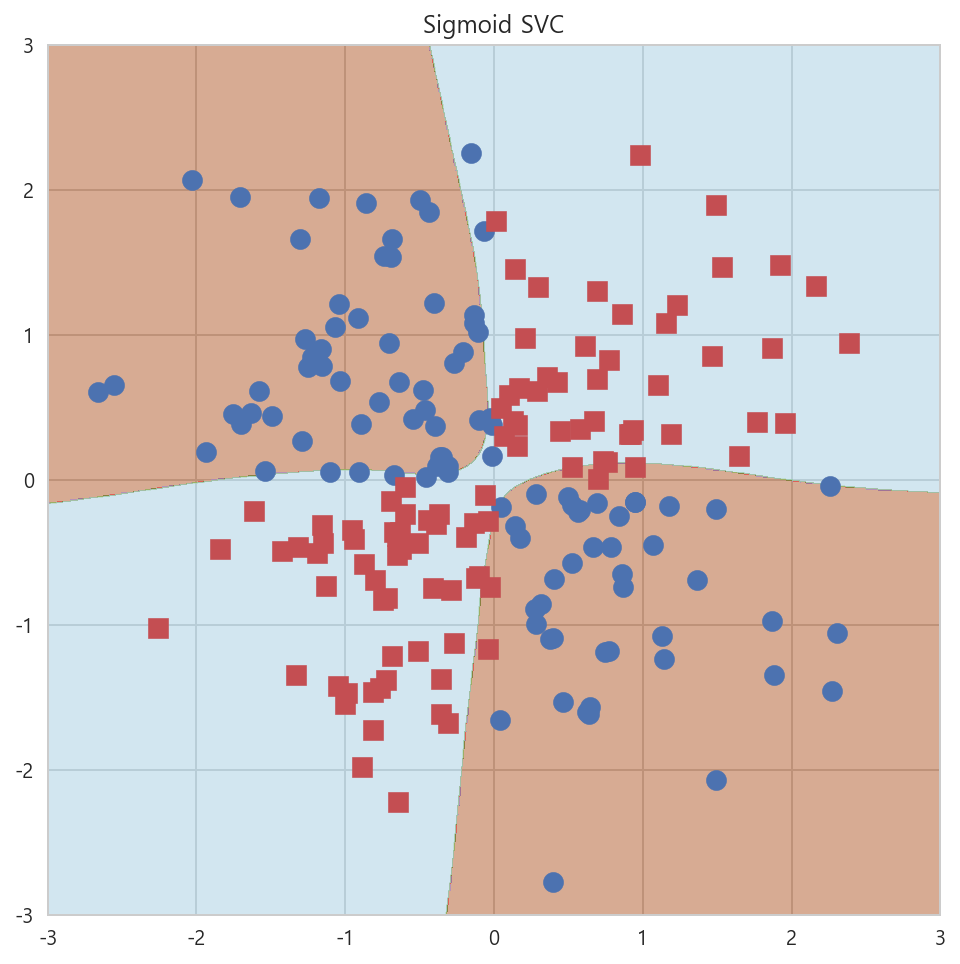

In [137]:
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, sigmoidsvc, "Sigmoid SVC")

# 커널파라미터

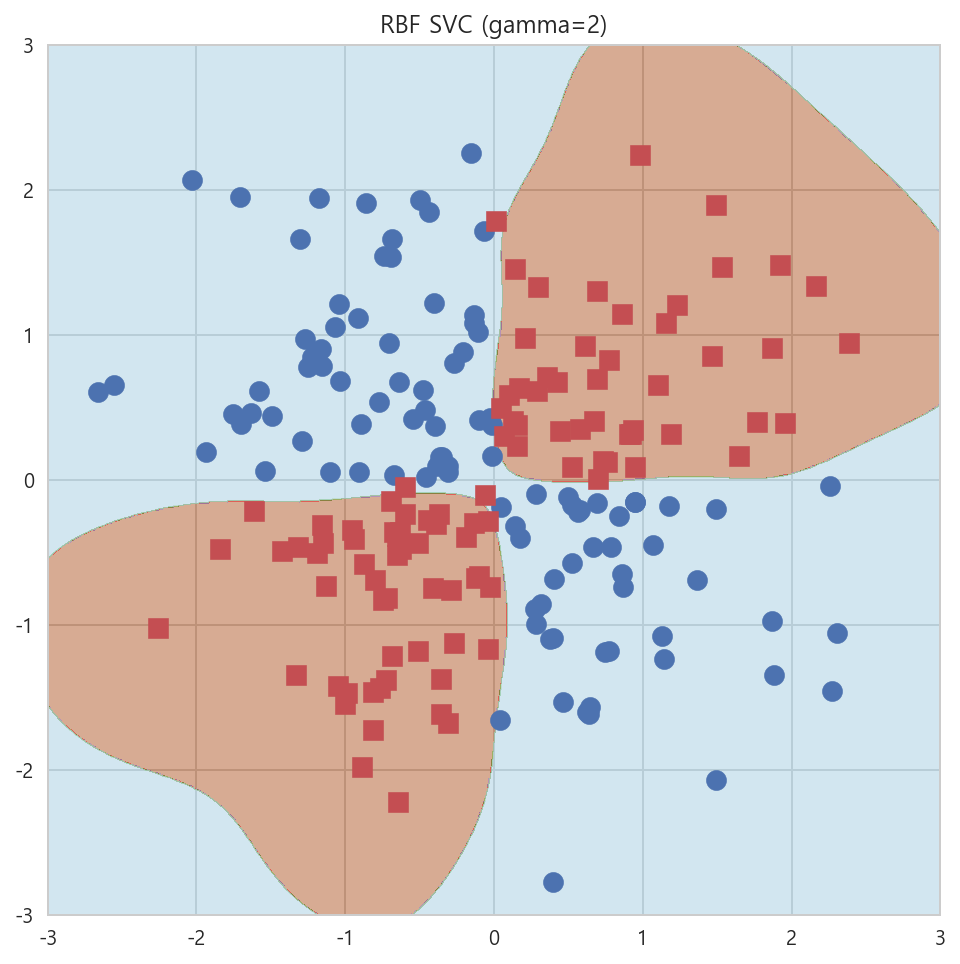

In [138]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVC (gamma=2)")


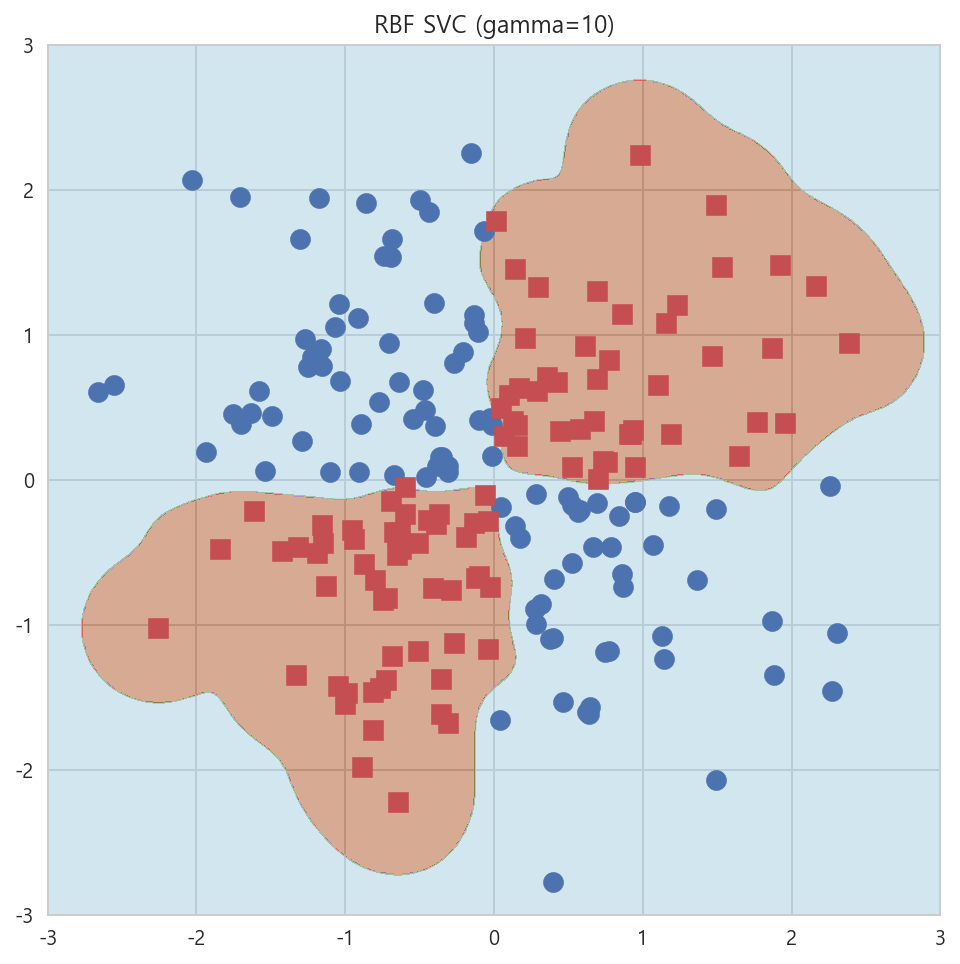

In [139]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, y_xor), "RBF SVC (gamma=10)")


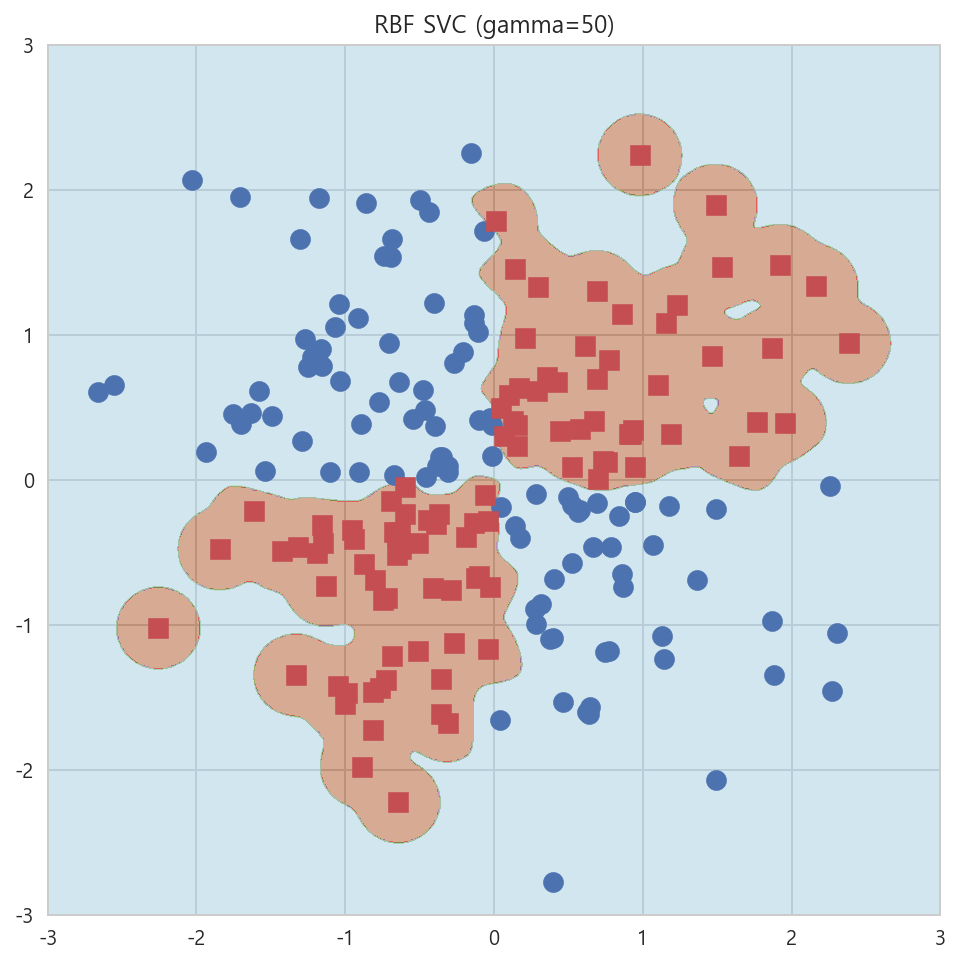

In [140]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, y_xor), "RBF SVC (gamma=50)")


# 예제 Iris

In [145]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    plt.figure(figsize=(8,8))
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y==2, 0], X[y==2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()


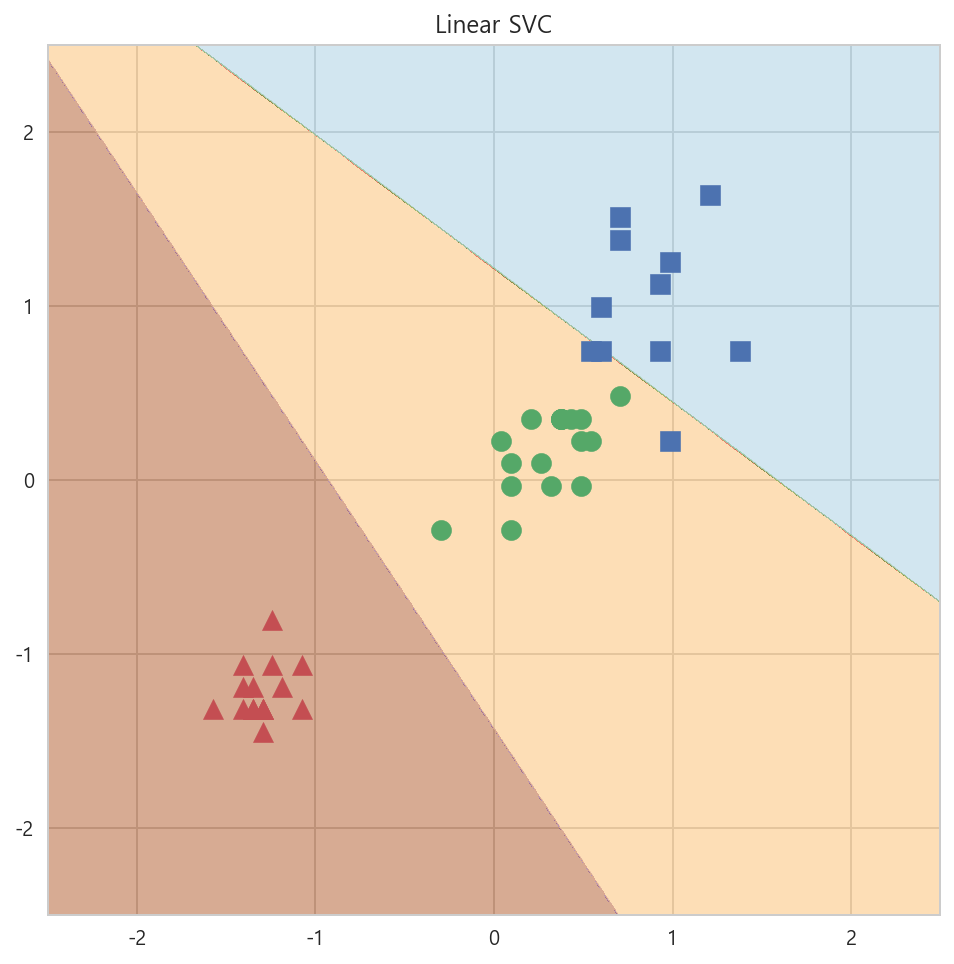

In [146]:
model = SVC(kernel='linear').fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Linear SVC")


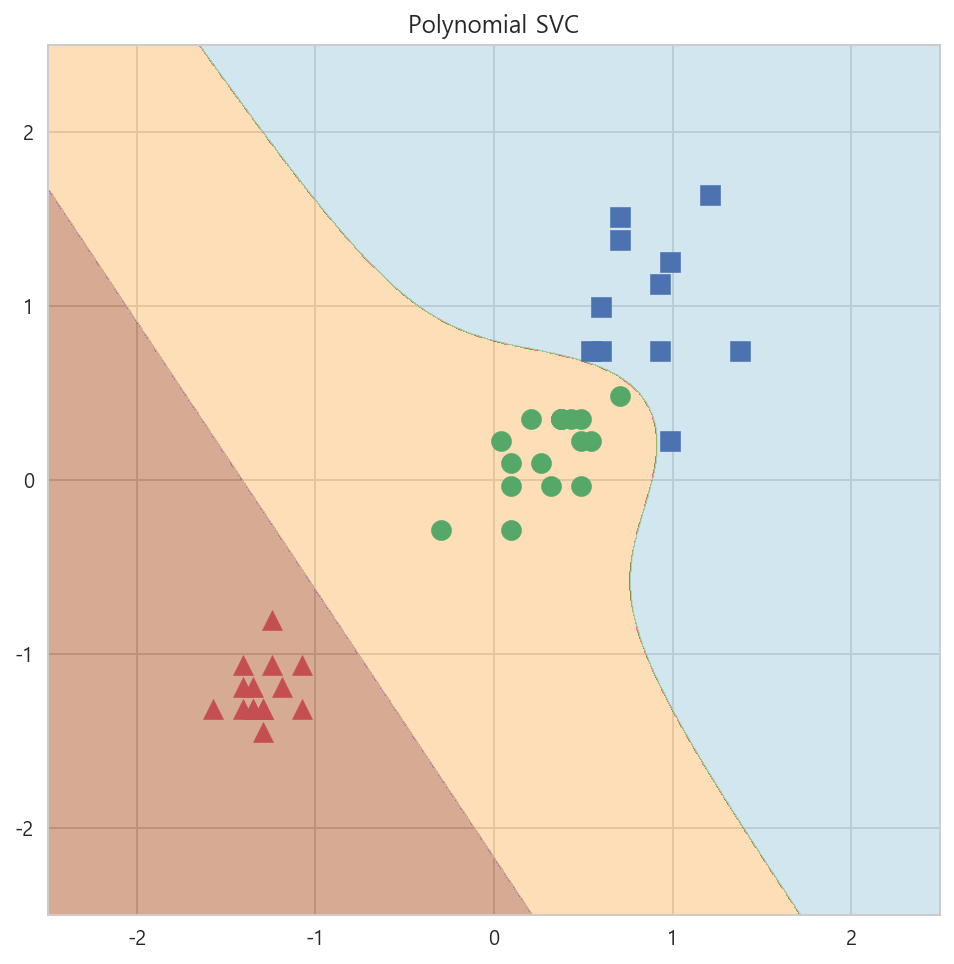

In [147]:
model = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Polynomial SVC")


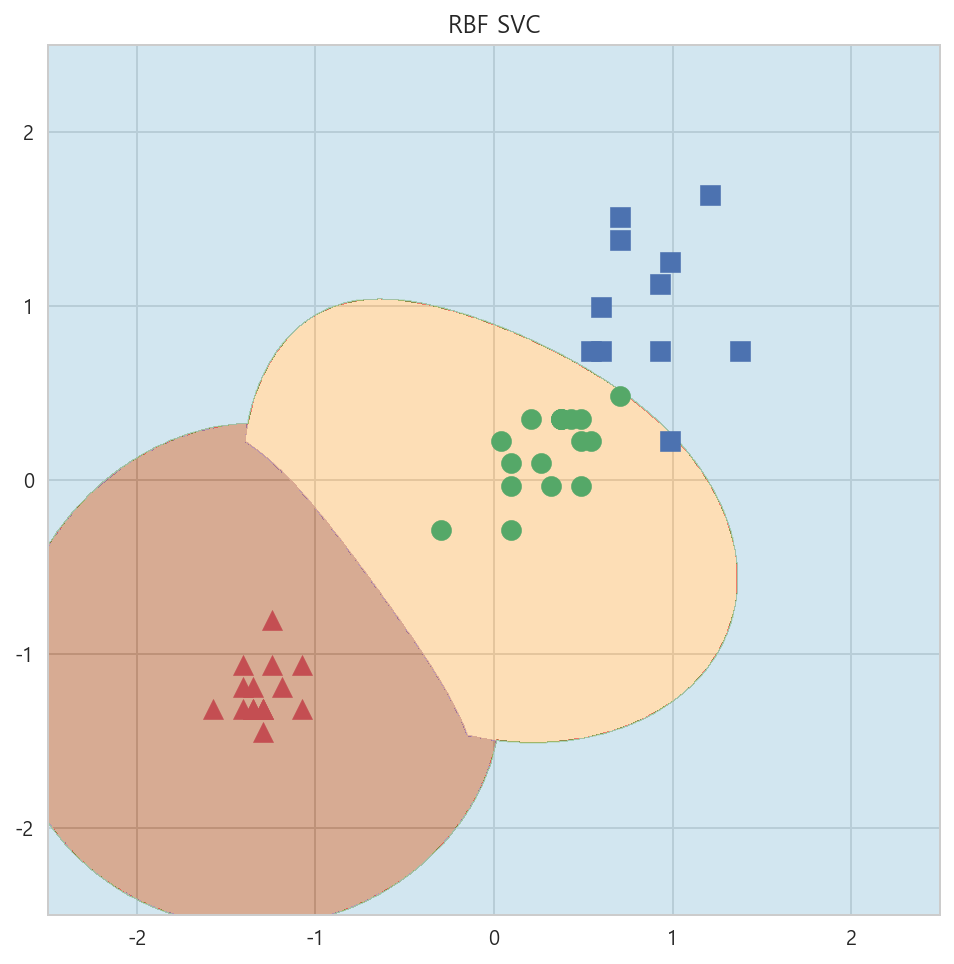

In [148]:
model = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "RBF SVC")